In [1]:
!pip install seaborn
!pip install sklearn
!pip install statsmodels 

You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import datasets
from sklearn import linear_model
from statsmodels.graphics.api import abline_plot
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import metrics

Load data

In [3]:
all_data = pd.read_csv(r"C:\Users\User\Desktop\Final Project\all_data.csv")

In [4]:
all_data.head()

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living,standard_of_living_num,independence_year
0,Finland,Europe,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,...,3.253,338424.0,5520314.0,536.0,6682.183616,7.83,1.70,good,0.938,1917.0
1,Denmark,Europe,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,...,2.868,43094.0,5818553.0,703.0,6182.815438,5.66,7.50,good,0.940,NaN
2,Switzerland,Europe,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,...,2.839,41284.0,8574832.0,1537.0,5213.328266,4.94,5.50,good,0.955,1291.0
3,Iceland,Europe,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,...,2.967,103000.0,361313.0,1940.0,7123.242203,5.01,1.75,good,0.949,1918.0
4,Netherlands,Europe,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,...,2.798,41850.0,17332850.0,778.0,5783.209851,4.09,9.25,good,0.944,1581.0


Data visualizations - Regional Area

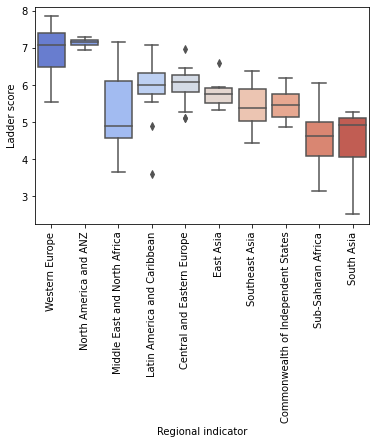

In [5]:
sns.boxplot(x='Regional indicator',y='Ladder score',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

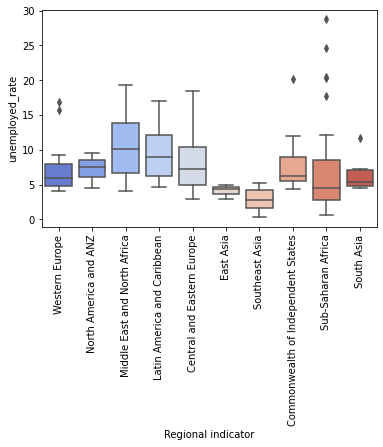

In [6]:
sns.boxplot(x='Regional indicator',y='unemployed_rate',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Data visualizations - Country Name

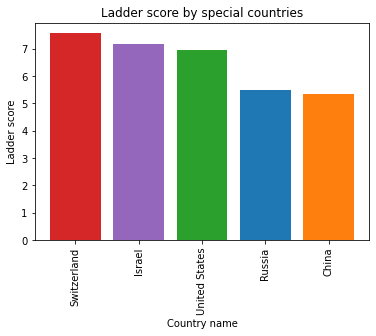

In [7]:
plt.bar(x='Country name',height='Ladder score',data=all_data[all_data['Country name'].isin(['Israel','United States','Russia','China','Switzerland'])]
        ,color = {'tab:blue','tab:orange','tab:green','tab:red','tab:purple'})
plt.xticks(rotation=90)
plt.xlabel('Country name')
plt.ylabel("Ladder score")
plt.title('Ladder score by special countries')
plt.show()

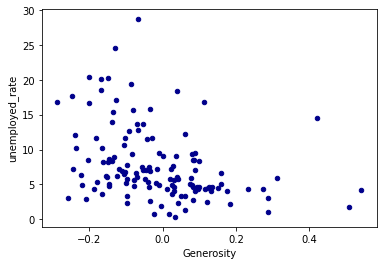

In [8]:
ax1 = all_data.plot.scatter(x='Generosity', y='unemployed_rate', c='DarkBlue')

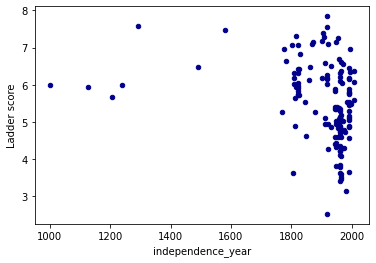

In [9]:
ax1 = all_data.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')

In [13]:
pie_lifeLevel_label=all_data_no_nan.groupby('standard_of_living')['Country name'].count().reset_index()
pie_lifeLevel_label

,standard_of_living,Country name
0,bad,28
1,good,47
2,medium,45


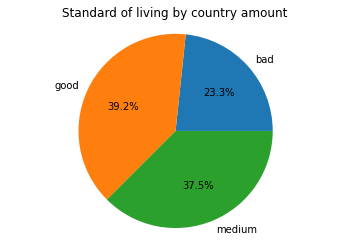

In [14]:
lifeLevel_portion = pie_lifeLevel_label['Country name']

fig, ax = plt.subplots()
my_labels = pie_lifeLevel_label['standard_of_living']
ax.pie(x=lifeLevel_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Standard of living by country amount')

plt.show()

Data visualizations - Continent analysis

In [15]:
GDP=all_data.groupby('continent')['Logged GDP per capita'].median().to_frame().reset_index()
GDP

,continent,Logged GDP per capita
0,Africa,8.0870
1,America,9.5075
2,Asia,9.5765
3,Europe,10.5140
4,Oceania,10.7195


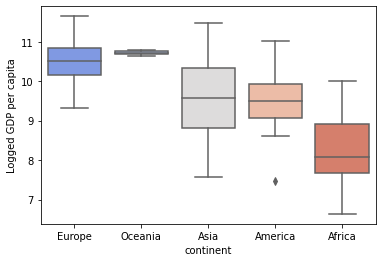

In [16]:
sns.boxplot(x='continent',y='Logged GDP per capita',data=all_data, palette='coolwarm')
plt.show()

In [17]:
pie_chart_continent_label=all_data_no_nan.groupby('continent')['population (thousands)'].sum().reset_index()
pie_chart_continent_label

,continent,population (thousands)
0,Africa,8.579673e+08
1,America,9.265919e+08
2,Asia,4.118819e+09
3,Europe,5.545680e+08
4,Oceania,3.028131e+07


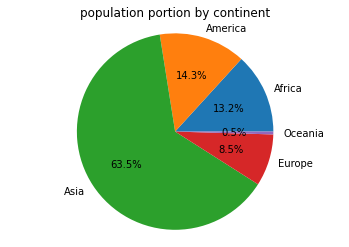

In [18]:
population_size = pie_chart_continent_label['population (thousands)']

fig, ax = plt.subplots()
my_labels = pie_chart_continent_label['continent']
ax.pie(x=population_size, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('population portion by continent')

plt.show()

In [19]:
pie_chart_area_label=all_data_no_nan.groupby('continent')['area'].sum().reset_index()
pie_chart_area_label

,continent,area
0,Africa,19681375.0
1,America,28366150.0
2,Asia,27650376.0
3,Europe,5099675.0
4,Oceania,7962491.0


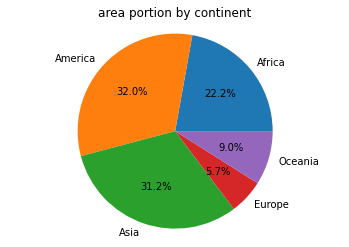

In [20]:
area_portion = pie_chart_area_label['area']

fig, ax = plt.subplots()
my_labels = pie_chart_area_label['continent']
ax.pie(x=area_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('area portion by continent')

plt.show()

Data measurments: min,max,count,sum

In [21]:
all_data[all_data['Ladder score']==all_data['Ladder score'].min()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living,standard_of_living_num,independence_year
148,Afghanistan,Asia,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,...,1.895,652230.0,38041754.0,327.0,3834.685659,11.73,12.6,bad,0.511,1919.0


In [22]:
all_data[all_data['Ladder score']==all_data['Ladder score'].max()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living,standard_of_living_num,independence_year
0,Finland,Europe,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,...,3.253,338424.0,5520314.0,536.0,6682.183616,7.83,1.7,good,0.938,1917.0


In [23]:
all_data.groupby('Regional indicator').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,Regional indicator,Country name
0,Sub-Saharan Africa,36
1,Western Europe,21
2,Latin America and Caribbean,20
3,Central and Eastern Europe,17
4,Middle East and North Africa,17
5,Commonwealth of Independent States,12
6,Southeast Asia,9
7,South Asia,7
8,East Asia,6
9,North America and ANZ,4


In [24]:
all_data.groupby('continent').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,continent,Country name
0,Asia,44
1,Africa,41
2,Europe,40
3,America,22
4,Oceania,2


Null identifications and Extra calculations

In [12]:
 all_data.isnull().sum()

Country name                                   0
continent                                      0
Regional indicator                             0
Ladder score                                   0
Standard error of ladder score                 0
upperwhisker                                   0
lowerwhisker                                   0
Logged GDP per capita                          0
Social support                                 0
Healthy life expectancy                        0
Freedom to make life choices                   0
Generosity                                     0
Perceptions of corruption                      0
Ladder score in Dystopia                       0
Explained by: Log GDP per capita               0
Explained by: Social support                   0
Explained by: Healthy life expectancy          0
Explained by: Freedom to make life choices     0
Explained by: Generosity                       0
Explained by: Perceptions of corruption        0
Dystopia + residual 

In [11]:
all_data_no_nan = all_data.copy().dropna()

In [ ]:
all_data['population_precentage']=all_data['population (thousands)'].apply(lambda x: x/7866403556)
all_data['population_precentage'].to_frame()

Correlation examination: Diagnostic  Analysis 

In [25]:
all_data_no_nan.columns

Index(['Country name', 'continent', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'area', 'population (thousands)',
       'avg precipitation', 'disFromEquator', 'unemployed_rate', 'AvgTemp',
       'standard_of_living', 'standard_of_living_num', 'independence_year'],
      dtype='object')

In [26]:
all_data_no_nan.drop(columns=['upperwhisker','lowerwhisker','Standard error of ladder score','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support',
       'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
                              'Explained by: Generosity', 'Explained by: Perceptions of corruption','Dystopia + residual'],inplace=True,axis=1)

In [27]:
correlation_all_data_no_nan = all_data_no_nan.corr()

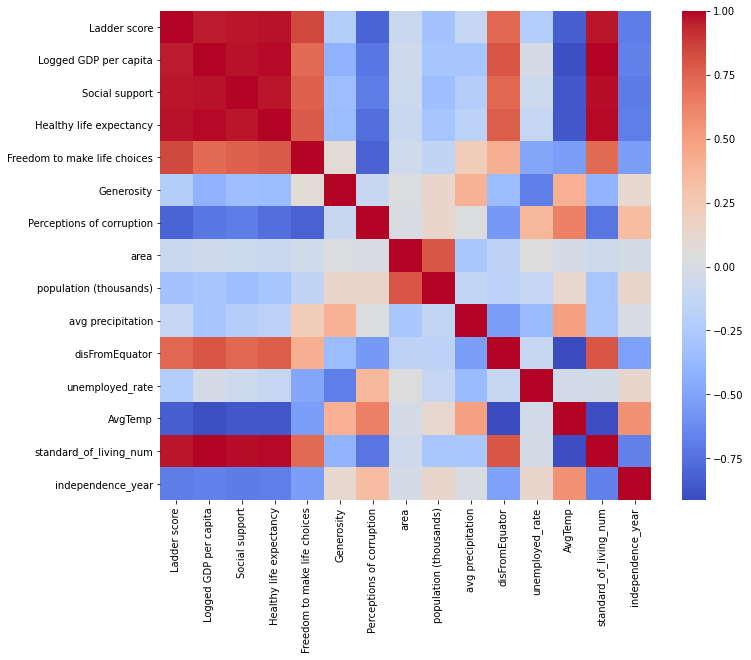

In [28]:
corr=correlation_all_data_no_nan.corr()
plt.subplots(figsize=(11,9))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

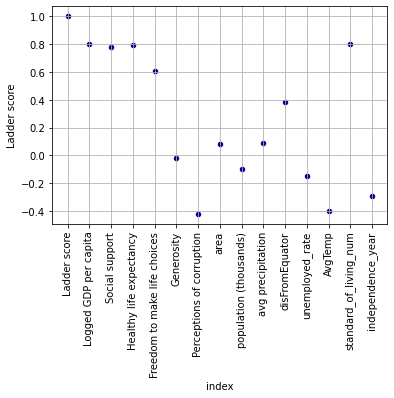

In [29]:
ax1 = correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().plot.scatter(x='index', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [30]:
correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().columns

Index(['index', 'Ladder score'], dtype='object')

Showing interesting correlations between the Ladder score and all of the other parameters, from the not null dataset (customized dataset)

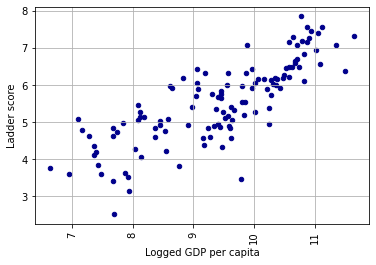

In [31]:
ax1 = all_data_no_nan.plot.scatter(x='Logged GDP per capita', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

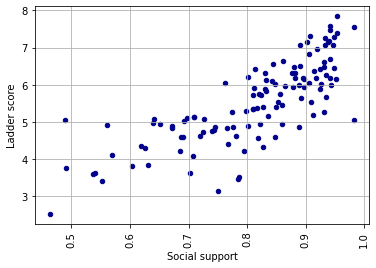

In [32]:
ax1 = all_data_no_nan.plot.scatter(x='Social support', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

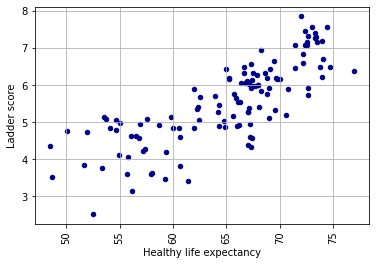

In [33]:
ax1 = all_data_no_nan.plot.scatter(x='Healthy life expectancy', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

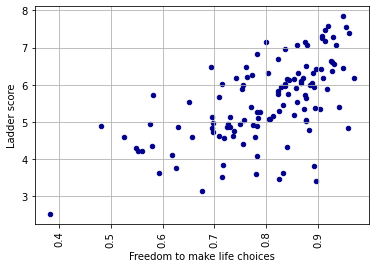

In [34]:
ax1 = all_data_no_nan.plot.scatter(x='Freedom to make life choices', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

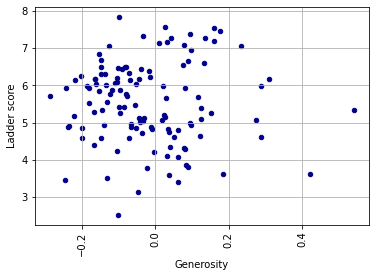

In [35]:
ax1 = all_data_no_nan.plot.scatter(x='Generosity', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

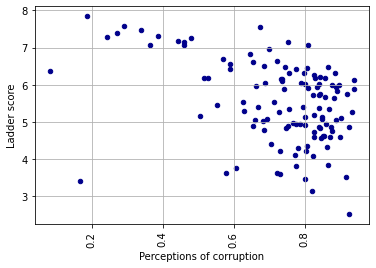

In [36]:
ax1 = all_data_no_nan.plot.scatter(x='Perceptions of corruption', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

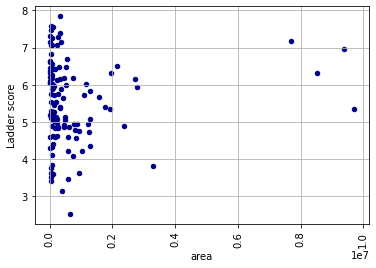

In [37]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

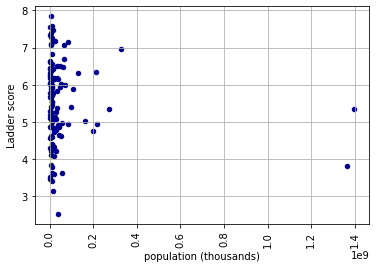

In [38]:
ax1 = all_data_no_nan.plot.scatter(x='population (thousands)', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

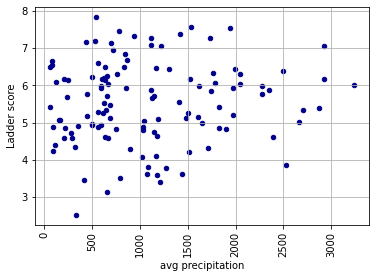

In [39]:
ax1 = all_data_no_nan.plot.scatter(x='avg precipitation', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

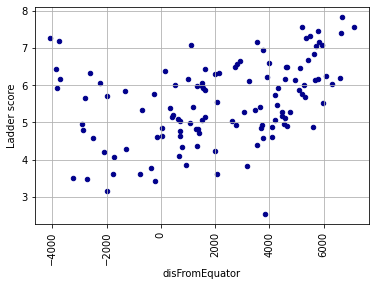

In [40]:
ax1 = all_data_no_nan.plot.scatter(x='disFromEquator', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

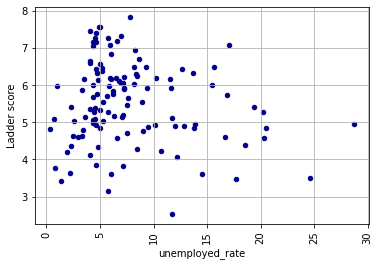

In [41]:
ax1 = all_data_no_nan.plot.scatter(x='unemployed_rate', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

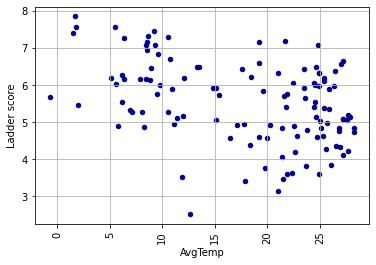

In [42]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

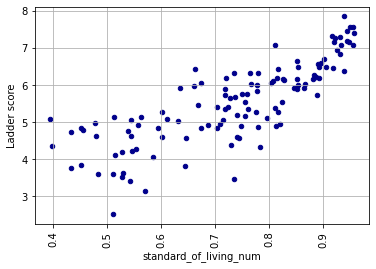

In [43]:
ax1 = all_data_no_nan.plot.scatter(x='standard_of_living_num', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

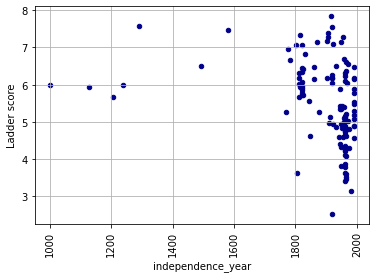

In [44]:
ax1 = all_data_no_nan.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Interesting correlation between 2 parameters (not Ladder Score)

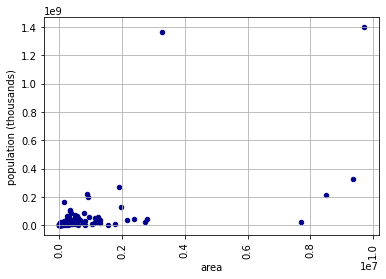

In [50]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='population (thousands)', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

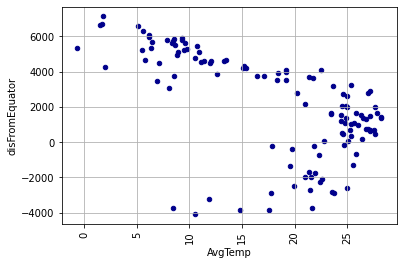

In [46]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='disFromEquator', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

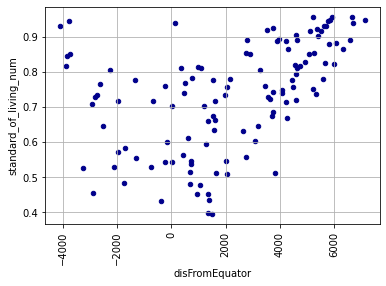

In [49]:
ax1 = all_data_no_nan.plot.scatter(x='disFromEquator', y='standard_of_living_num', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

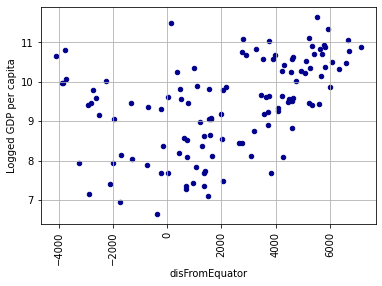

In [47]:
ax1 = all_data_no_nan.plot.scatter(x='disFromEquator', y='Logged GDP per capita', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show() 

In [51]:
clean_data=all_data_no_nan.copy().drop(['Country name','continent','Regional indicator','standard_of_living'],axis=1)
clean_data.to_csv(r"C:\Users\User\Desktop\Final Project\clean_data.csv", index=False)

In [52]:
clean_data.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,independence_year
0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,338424.0,5520314.0,536.0,6682.183616,7.83,1.70,0.938,1917.0
2,7.571,11.117,0.942,74.4,0.919,0.025,0.292,41284.0,8574832.0,1537.0,5213.328266,4.94,5.50,0.955,1291.0
3,7.554,10.878,0.983,73.0,0.955,0.160,0.673,103000.0,361313.0,1940.0,7123.242203,5.01,1.75,0.949,1918.0
4,7.464,10.932,0.942,72.4,0.913,0.175,0.338,41850.0,17332850.0,778.0,5783.209851,4.09,9.25,0.944,1581.0
5,7.392,11.053,0.954,73.3,0.960,0.093,0.270,323802.0,5347896.0,1414.0,6652.812283,4.62,1.50,0.957,1905.0


In [58]:
X_train, X_test, y_train , y_test = train_test_split(clean_data.copy().drop(['Ladder score'],axis=1), clean_data['Ladder score'], test_size=0.33, random_state=1)
                                                                                                     
regressor = ElasticNet(alpha=0.015)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)


0.6105213586718622

In [59]:
mean_squared_error(y_test, y_pred)

0.36527874719065384

In [60]:
feature_list = X_test.columns
all_data_no_nan['pred'] = all_data_no_nan[feature_list].apply(lambda row: regressor.predict(np.array(row).reshape(1, -1)), axis=1)
all_data_no_nan['error']=all_data_no_nan['Ladder score']-all_data_no_nan['pred']
all_data_no_nan['absolute_error']=all_data_no_nan['error'].apply(lambda x: round(abs(x[0]), 2))

all_data_no_nan.sort_values('absolute_error')


,Country name,continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living,standard_of_living_num,independence_year,pred,error,absolute_error
83,China,Asia,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,...,645.0,3460.897973,5.000000,6.95,medium,0.761,1949.0,[5.338346725464121],[0.0006532745358791558],0.00
67,Greece,Europe,Western Europe,5.723,10.279,0.823,72.600,0.582,-0.288,0.823,...,652.0,4217.412446,16.850000,15.40,good,0.888,1821.0,[5.7260509417244],[-0.0030509417243997916],0.00
44,Kazakhstan,Asia,Commonwealth of Independent States,6.152,10.155,0.952,65.200,0.853,-0.069,0.733,...,250.0,5678.083799,6.050000,6.40,good,0.825,1991.0,[6.148215522727171],[0.0037844772728288234],0.00
46,Kuwait,Asia,Middle East and North Africa,6.106,10.817,0.843,66.900,0.867,-0.104,0.736,...,121.0,3261.939120,6.790000,25.35,good,0.806,1961.0,[6.091491453835959],[0.014508546164041292],0.01
138,India,Asia,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774,...,1083.0,3182.542134,7.110000,23.65,medium,0.645,1947.0,[3.832019482233203],[-0.013019482233203039],0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Zimbabwe,Africa,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,...,657.0,-1979.838807,5.730000,21.00,bad,0.571,1980.0,[4.334284309261986],[-1.189284309261986],1.19
145,Botswana,Africa,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,...,416.0,-2738.018951,17.700001,21.50,medium,0.735,1966.0,[4.700523380614621],[-1.233523380614621],1.23
141,Tanzania,Africa,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577,...,1071.0,-755.104205,2.160000,22.35,bad,0.529,1961.0,[4.949819335247394],[-1.3268193352473938],1.33
128,Sri Lanka,Asia,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,...,1712.0,768.063125,4.840000,26.95,medium,0.782,1948.0,[5.827117741178036],[-1.5021177411780355],1.50


In [99]:
X = clean_data.copy().drop(['Ladder score'],axis=1)
y = clean_data['Ladder score']
lasso = linear_model.Lasso(alpha=0.001)

In [100]:
lasso.fit(X_train, y_train)
lasso.score(X, y)

0.7900821645688552

In [101]:
cv_results = cross_validate(lasso, X, y, cv=5)
sorted(cv_results.keys())
cv_results['test_score']
print(cv_results)

{'fit_time': array([0.00398922, 0.00299168, 0.00398803, 0.00298548, 0.00199556]), 'score_time': array([0.00299215, 0.00299287, 0.00099778, 0.0009973 , 0.00099659]), 'test_score': array([ -3.60669648, -10.56176126,  -2.11174728, -24.77587577,
        -2.30466762])}


In [102]:
scores = cross_validate(lasso, X, y, cv=5, scoring=('r2','neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])
scores.keys()

[-0.71430821 -0.23944871 -0.18376266 -0.45714733 -0.91996292]


dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])

In [103]:
DecisionTree = tree.DecisionTreeRegressor(splitter='best',random_state=0,criterion='friedman_mse')
cv_results = cross_validate(DecisionTree, X, y, cv=5)
print(cv_results) 

{'fit_time': array([0.0039804 , 0.00303292, 0.00395536, 0.00299454, 0.00398803]), 'score_time': array([0.00301862, 0.0019896 , 0.00298905, 0.00199437, 0.00099778]), 'test_score': array([ -4.80585339, -16.19322291, -14.96434978, -34.85388041,
        -4.4293519 ])}


In [104]:
DecisionTree.fit(X_train, y_train)
DecisionTree.score(X, y)

0.8637237237654054

In [105]:
neigh = KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',metric='seuclidean')

In [106]:
neigh.fit(X_train, y_train)
neigh.score(X, y)

c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(


0.9072053172194294

c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclide

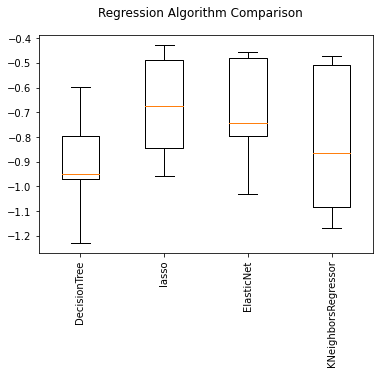

In [107]:
models = [DecisionTree,lasso,regressor,neigh]
results = []
names = ['DecisionTree','lasso','ElasticNet','KNeighborsRegressor']
for model in models:
    cv_results = cross_validate(model,X, y, cv=5, scoring=('neg_root_mean_squared_error'))
    results.append(cv_results['test_score'])

fig = plt.figure()
fig.suptitle('Regression Algorithm Comparison')
plt.boxplot(results)
plt.xticks([1,2,3,4],names,rotation='vertical')
plt.show()

KPI's

In [128]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.48
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.12
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.6981916284230284
Max Error: 1.65


Residuals - DecisionTree model

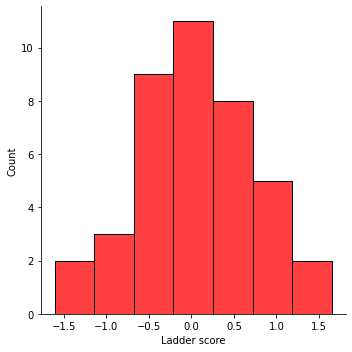

In [127]:
model = DecisionTree
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="red")
plt.show()

Feature importance - DecisionTree model

In [129]:
print(importance)

[ 2.66445383e-01  3.14858946e-01  5.88226290e-02  9.39934061e-01
  0.00000000e+00 -5.45614396e-01  1.15839938e-07 -1.28479935e-09
  1.21662821e-04  3.94068129e-05 -3.80084001e-02  5.47673267e-03
  0.00000000e+00 -6.71466001e-04]


Feature: Logged GDP per capita, Score: 0.005414
Feature: Social support, Score: 0.559523
Feature: Healthy life expectancy, Score: 0.084626
Feature: Freedom to make life choices, Score: 0.039708
Feature: Generosity, Score: 0.000134
Feature: Perceptions of corruption, Score: 0.008817
Feature: area, Score: 0.002719
Feature: population (thousands), Score: 0.001857
Feature: avg precipitation, Score: 0.028597
Feature: disFromEquator, Score: 0.026582
Feature: unemployed_rate, Score: 0.007940
Feature: AvgTemp, Score: 0.048025
Feature: standard_of_living_num, Score: 0.155257
Feature: independence_year, Score: 0.030800


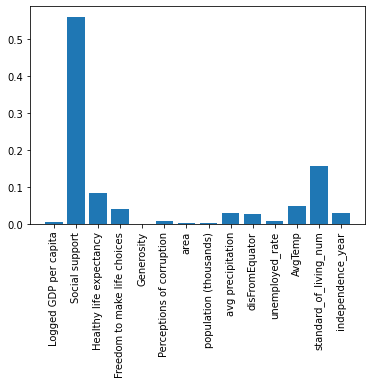

In [111]:
model = DecisionTree

model.fit(X_train, y_train)

importance = model.feature_importances_

feature_names= X_train.columns
for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],feature_names,rotation='vertical')
pyplot.show()

Predicted vs True

In [112]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


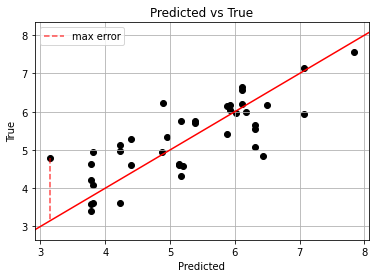

In [113]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()

KPI's - lasso model

In [115]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.59
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.08
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.6213588257515603
Max Error: 2.01


Residuals - lasso model

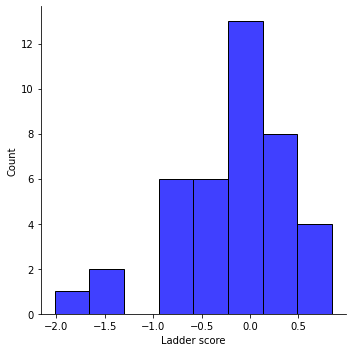

In [114]:
model = lasso
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="blue")
plt.show()

Feature importance - lasso model

In [117]:
print(importance)

[1.29071368e-01 1.77318966e+00 4.30800365e-02 2.35048384e+00
 0.00000000e+00 9.12958845e-01 1.14346240e-07 1.28152720e-09
 7.20228724e-05 6.53593627e-05 2.41088864e-02 1.36154372e-02
 0.00000000e+00 7.08848526e-04]


Feature: Logged GDP per capita, Score: 0.129071
Feature: Social support, Score: 1.773190
Feature: Healthy life expectancy, Score: 0.043080
Feature: Freedom to make life choices, Score: 2.350484
Feature: Generosity, Score: 0.000000
Feature: Perceptions of corruption, Score: 0.912959
Feature: area, Score: 0.000000
Feature: population (thousands), Score: 0.000000
Feature: avg precipitation, Score: 0.000072
Feature: disFromEquator, Score: 0.000065
Feature: unemployed_rate, Score: 0.024109
Feature: AvgTemp, Score: 0.013615
Feature: standard_of_living_num, Score: 0.000000
Feature: independence_year, Score: 0.000709


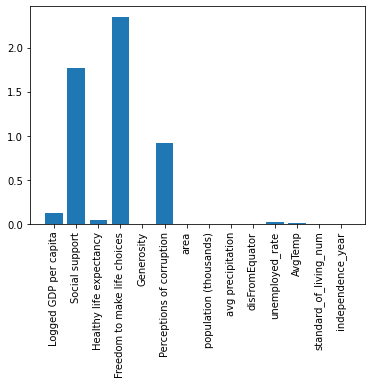

In [116]:
model= lasso
reg = model.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
feature_names= X_train.columns

for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],feature_names,rotation='vertical')
pyplot.show()

In [118]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


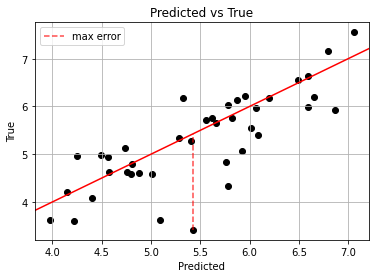

In [119]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()

KPI's- linear regression model

In [121]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.61
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.08
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.6043829474684522
Max Error: 1.91


Residuals - linear regression 

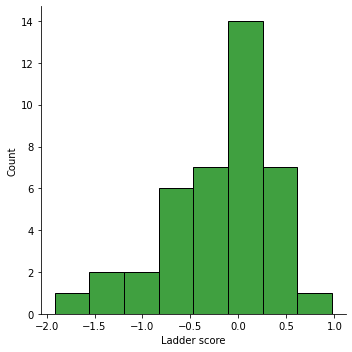

In [120]:
model = regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="green")
plt.show()

Feature importance - linear regression model

In [130]:
print(importance)

[ 2.66445383e-01  3.14858946e-01  5.88226290e-02  9.39934061e-01
  0.00000000e+00 -5.45614396e-01  1.15839938e-07 -1.28479935e-09
  1.21662821e-04  3.94068129e-05 -3.80084001e-02  5.47673267e-03
  0.00000000e+00 -6.71466001e-04]


Feature: Logged GDP per capita, Score: 0.266445
Feature: Social support, Score: 0.314859
Feature: Healthy life expectancy, Score: 0.058823
Feature: Freedom to make life choices, Score: 0.939934
Feature: Generosity, Score: 0.000000
Feature: Perceptions of corruption, Score: -0.545614
Feature: area, Score: 0.000000
Feature: population (thousands), Score: -0.000000
Feature: avg precipitation, Score: 0.000122
Feature: disFromEquator, Score: 0.000039
Feature: unemployed_rate, Score: -0.038008
Feature: AvgTemp, Score: 0.005477
Feature: standard_of_living_num, Score: 0.000000
Feature: independence_year, Score: -0.000671


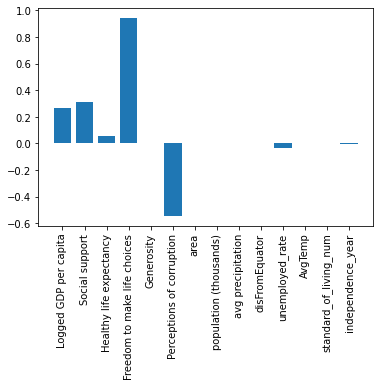

In [124]:
model= regressor

reg = model.fit(X_train, y_train)

importance = (model.coef_)
feature_names= X_train.columns

for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],feature_names,rotation='vertical')
pyplot.show()

In [125]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


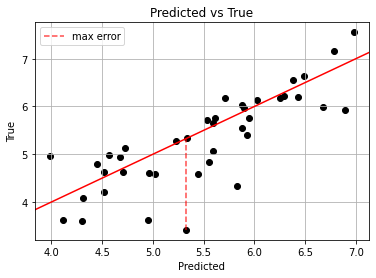

In [126]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()